In [109]:
data <- read.csv(file.path("..","data","training_data.csv"))
data <- na.omit(data)
dim(data)
head(data)

[1]  708 4872

,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<fct>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,low,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,⋯,0,0,1,0,1,0,1,0,1,0
2,high,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,⋯,0,0,0,0,0,0,0,0,0,0
3,high,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,⋯,0,0,1,0,1,1,1,0,1,1
4,high,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,⋯,0,0,0,0,0,0,0,0,0,0
5,low,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,⋯,0,0,0,0,0,0,0,0,0,0
6,high,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,⋯,0,0,0,0,1,0,1,0,1,0


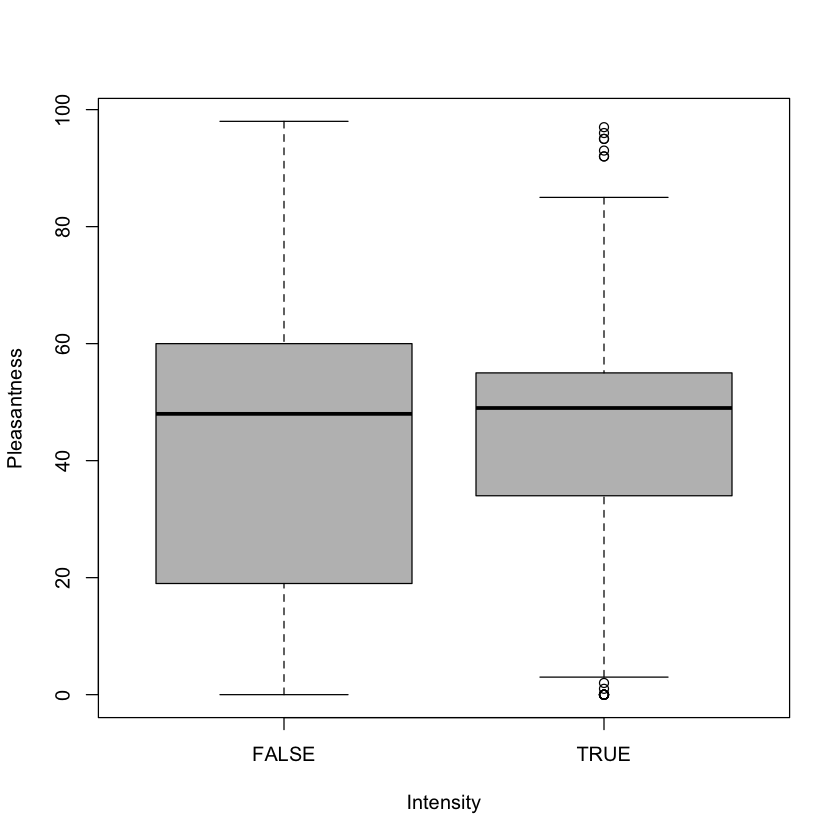

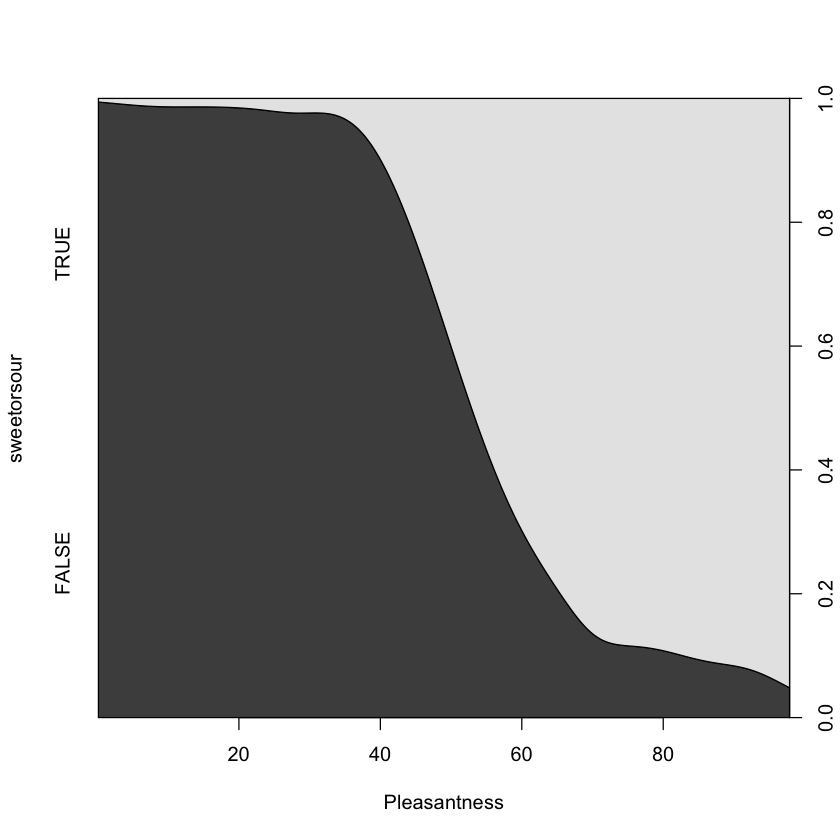

In [110]:
#plot pleasantness en fonction some features (intensity)

plot(data$Intensity, data$VALENCE.PLEASANTNESS, xlab='Intensity', ylab='Pleasantness', col='gray', xaxt='n', )
axis(1,c(1,2),c("FALSE","TRUE"))


sweetorsour<- factor(data$SWEETORSOUR)
cdplot( sweetorsour ~ data$VALENCE.PLEASANTNESS, xlab= 'Pleasantness')


interpretation : 

--> on peut voir que sweet or sour devient true quand pleasantness augmente . 

In [111]:
# change the low or high Intensity to binary values 

lookup <- c("low" = 1, "high" = 0)
data$Intensity <- lookup[data$Intensity]
head(data)


,Intensity,VALENCE.PLEASANTNESS,SWEETORSOUR,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,⋯,Psychotic.80,Psychotic.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<int>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,45,FALSE,302.0,208.33,5.952,19.698,34.491,21.523,39.571,⋯,0,0,1,0,1,0,1,0,1,0
2,1,49,TRUE,72.6,122.18,6.431,11.349,18.745,12.261,21.285,⋯,0,0,0,0,0,0,0,0,0,0
3,1,56,TRUE,259.0,242.29,7.572,20.832,32.167,21.693,35.535,⋯,0,0,1,0,1,1,1,0,1,1
4,1,7,FALSE,56.6,88.12,6.294,7.537,14.189,7.955,16.080,⋯,0,0,0,0,0,0,0,0,0,0
5,0,51,FALSE,84.7,136.21,6.191,12.876,21.629,14.023,24.701,⋯,0,0,0,0,0,0,0,0,0,0
6,1,21,FALSE,160.0,192.28,6.409,17.644,29.723,19.000,33.740,⋯,0,0,0,0,1,0,1,0,1,0


In [112]:

#tire des datas : bougeons les collones avec var = 0 and colonnes correlées  .
data <- data[, which(apply(data, 2, var)!=0)] 
cormat<- cor(data)



c<- colnames(cormat)[!apply((lower.tri(cormat) & abs(cormat)==1),2,any)] #lower.tri bc cormat matrice symetrique.

data<-data[, c]
data<-na.omit(data)
data <- data[,-3] 

dim(data)
head(data)



[1]  708 2880

,Intensity,VALENCE.PLEASANTNESS,complexity.from.pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,⋯,Depressant.80,Depressant.50,Hypertens.80,Hypertens.50,Hypnotic.80,Hypnotic.50,Neoplastic.80,Neoplastic.50,Infective.80,Infective.50
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,45,302.0,208.33,5.952,19.698,34.491,21.523,39.571,0.563,⋯,0,0,1,0,1,0,1,0,1,0
2,1,49,72.6,122.18,6.431,11.349,18.745,12.261,21.285,0.597,⋯,0,0,0,0,0,0,0,0,0,0
3,1,56,259.0,242.29,7.572,20.832,32.167,21.693,35.535,0.651,⋯,1,0,1,0,1,1,1,0,1,1
4,1,7,56.6,88.12,6.294,7.537,14.189,7.955,16.080,0.538,⋯,0,0,0,0,0,0,0,0,0,0
5,0,51,84.7,136.21,6.191,12.876,21.629,14.023,24.701,0.585,⋯,0,0,0,0,0,0,0,0,0,0
6,1,21,160.0,192.28,6.409,17.644,29.723,19.000,33.740,0.588,⋯,0,0,0,0,1,0,1,0,1,0


In [113]:
#Feature Engineering : foward regression create new data
library(leaps)


regfit.fwd <- regsubsets(data$VALENCE.PLEASANTNESS ~ . ,  method = "forward", data, nvmax = 1000)
regfit.fwd.summary <- summary(regfit.fwd)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2547  linear dependencies found”


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“le nombre d'objets à remplacer n'est pas multiple de la taille du remplacement”


[1] 167

[1] 708 168

,Intensity,VALENCE.PLEASANTNESS,piPC06,X2,X4A,VE1_X,VE2_Dz.v.,VE1_Dz.p.,SpAbs_B.e.,SpMAD_B.p.,⋯,F03.C.O.,F04.O.O.,F04.O.S.,F05.C.N.,F08.C.S.,DLS_01,DLS_02,DLS_cons,CMC.80,Depressant.50
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,0,45,4.190,7.023,0.111,3.785,0.233,3.499,23.503,1.347,⋯,2,0,0,0,0,1,1.00,1.00,1,0
2,1,49,3.876,3.534,0.145,2.955,0.279,2.642,14.449,1.472,⋯,2,0,0,0,0,1,0.83,0.84,0,0
3,1,56,4.952,7.293,0.135,4.201,0.222,4.059,30.200,1.548,⋯,7,0,0,0,0,1,1.00,0.87,1,0
4,1,7,0.000,2.488,0.000,2.360,0.385,1.973,9.480,1.288,⋯,4,0,0,0,0,1,0.83,0.95,0,0
5,0,51,3.766,3.784,0.145,3.119,0.295,2.969,15.943,1.506,⋯,3,0,0,0,0,1,0.83,0.84,0,0
6,1,21,3.797,5.302,0.153,3.705,0.248,3.479,22.336,1.488,⋯,4,0,0,0,0,1,0.83,0.95,1,0


Adj.R2,CP,BIC
<int>,<int>,<int>
167,1,16


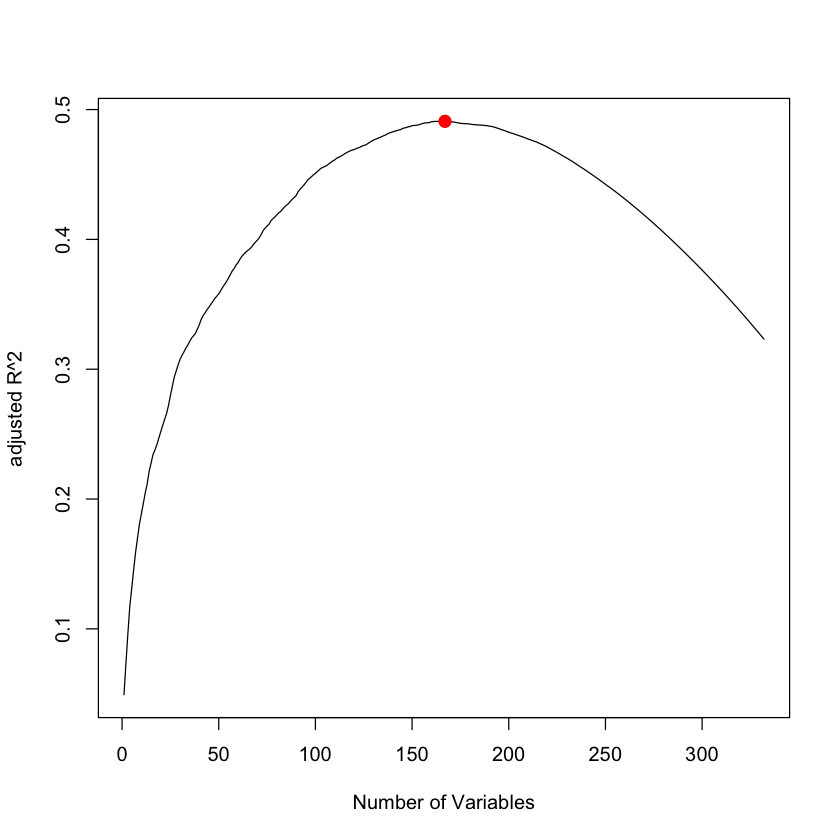

In [114]:

# plot
plot(regfit.fwd.summary$adjr2, type = "l", 
     ,xlab = "Number of Variables", ylab = "adjusted R^2")
adjr2.max <- which.max(regfit.fwd.summary$adjr2)
adjr2.max
points(adjr2.max, regfit.fwd.summary$adjr2[adjr2.max], col = "red", cex = 2, pch = 20)

data_ <- data[, which(regfit.fwd.summary$which[adjr2.max, ]!=0)] #j'ai mis différent de zéro et pas = 
dim(data_)  # que 168 ???
head(data_) 

data.frame(
  Adj.R2 = which.max(regfit.fwd.summary$adjr2),
  CP = which.min(regfit.fwd.summary$cp),
  BIC = which.min(regfit.fwd.summary$bic)
)


In [133]:
library(tidymodels)
length(data[, 1])
length(data[, 2])

validation_data <- vfold_cv(data, v = 5)
validation_data <-na.omit(validation_data )
fit_and_evaluate <- function(fold, formula = data$VALENCE.PLEASANTNESS ~ . ) {
    fit <- regsubsets(formula, analysis(fold), method = "forward", nvmax = 30)
    #evaluate(fold, fit)
}
cv.errors <- sapply(validation_data$splits, fit_and_evaluate)
mean.cv.errors <- rowMeans(cv.errors)
plot(mean.cv.errors, type = "l", ylim = c(1, 4), xlab = "Number of Variables", ylab = "5-fold CV right")
cv.min = which.min(mean.cv.errors)
points(cv.min, mean.cv.errors[cv.min], col = "red", cex = 2, pch = 20)
abline(sd(data$VALENCE.PLEASANTNESS), 0, lty = "dashed")

[1] 708

[1] 708

ERROR: Error in model.frame.default(data = analysis(fold), formula = data$VALENCE.PLEASANTNESS ~ : les longueurs des variables diffèrent (trouvé pour 'Intensity')


--> Gardons les coeff de basé sur adjusted R (CP et BIC enleve trop de predictor)

Warning message:
“In prcomp.default(data.sc, data = F) :
 extra argument ‘data’ will be disregarded”


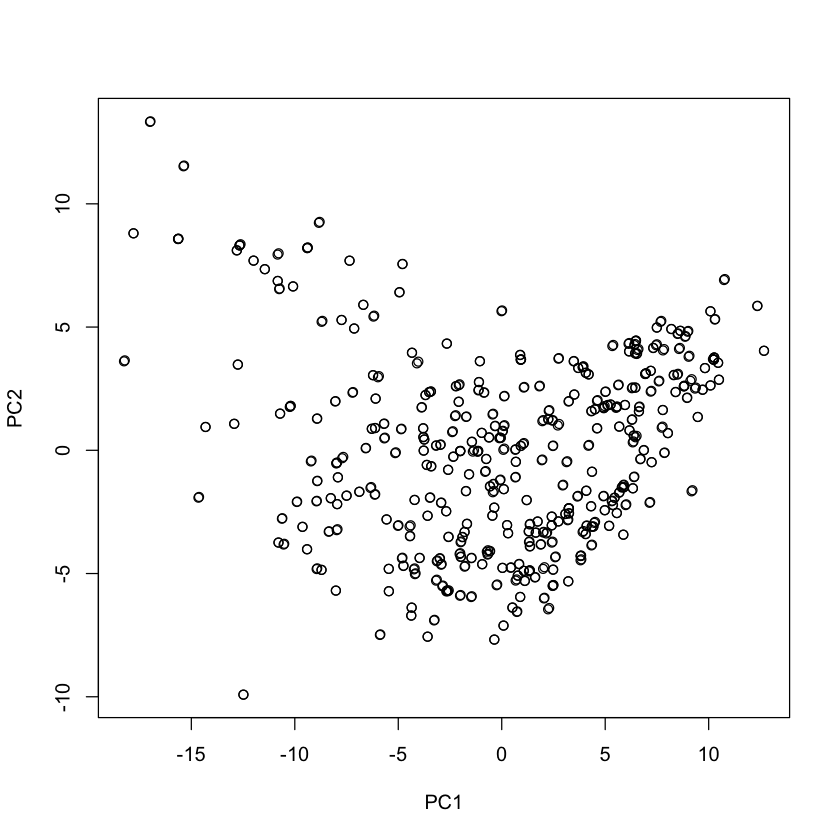

In [60]:
#PCA with new_data

data.sc <- scale(data_[, -1]) #remove  prediction data()
pca <- prcomp(data.sc, data= F)
plot(pca$x[,1:2])

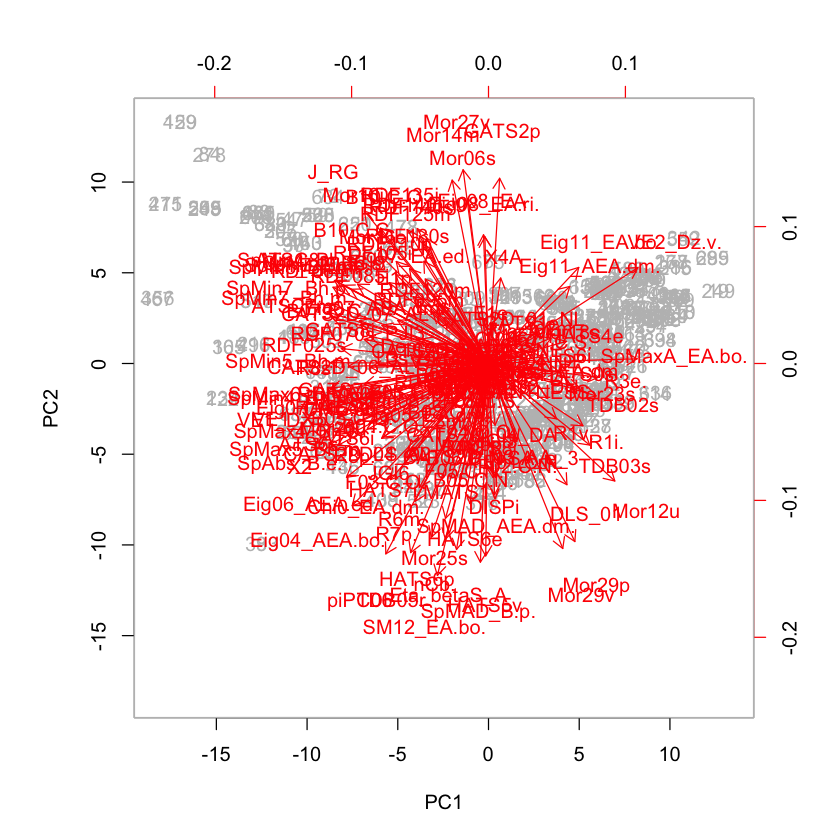

In [61]:
biplot(pca, col = c('gray', 'red'), scale = 0)

In [31]:
s <- svd(data.sc)
sum((s$v - pca$rotation)^2)
sum((s$u %*% diag(s$d) - pca$x)^2)

[1] 2.275322e-20

[1] 3.034409e-23

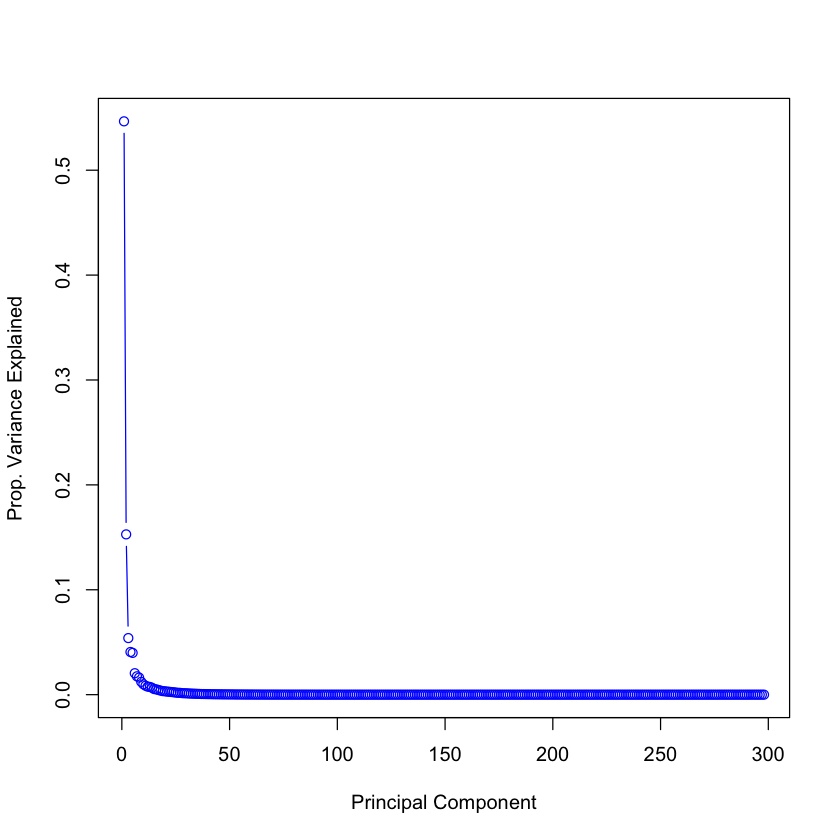

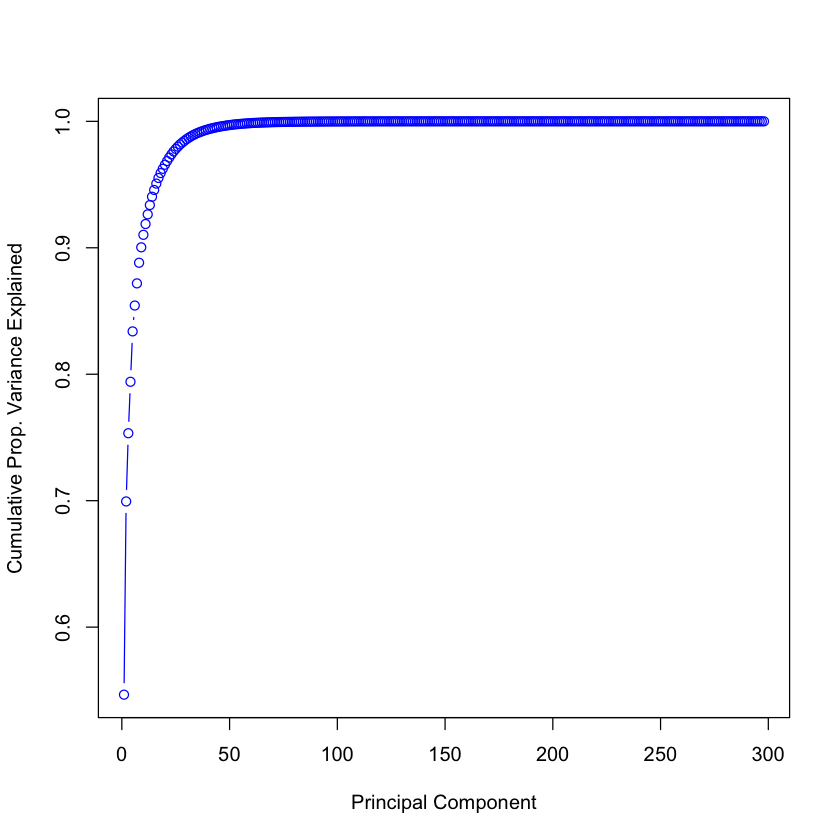

In [32]:
pca.var <- pca$sdev^2
pca.vare <- pca.var / sum(pca.var)
plot(pca.vare, xlab = "Principal Component", ylab = "Prop. Variance Explained", col = "blue", type = "b")
plot(cumsum(pca.vare), xlab = "Principal Component", ylab = "Cumulative Prop. Variance Explained", col = "blue", type = "b")

--> on voit clairement que PC ne sont pas suffisante pour representer les données . 

In [102]:
#divide into training and test set 
set.seed(1)
idx.train <- sample(nrow(data_), nrow(data_)*3/4)
data.train <- data_[idx.train,] 
data.test <- data_[-idx.train,]


In [103]:
#perform linear multiple regression on the trainig set 
lm <- lm(data.train$VALENCE.PLEASANTNESS ~ ., data = data.train) 
summary(lm)




Call:
lm(formula = data.train$VALENCE.PLEASANTNESS ~ ., data = data.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.434  -9.021  -0.027   8.408  50.898 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.459e+02  1.741e+02  -1.412 0.158763    
Intensity     -2.110e+00  1.569e+00  -1.345 0.179498    
piPC06         6.811e+00  4.251e+00   1.602 0.109963    
X2             4.186e+01  1.238e+01   3.381 0.000802 ***
X4A           -1.119e+02  4.912e+01  -2.278 0.023317 *  
VE1_X         -4.521e+01  1.691e+01  -2.673 0.007864 ** 
VE2_Dz.v.      1.591e+02  1.414e+02   1.125 0.261161    
VE1_Dz.p.     -2.657e+01  1.526e+01  -1.741 0.082482 .  
SpAbs_B.e.    -1.185e+01  4.625e+00  -2.561 0.010834 *  
SpMAD_B.p.     2.517e+02  5.647e+01   4.457 1.11e-05 ***
ATS6s          5.479e+00  4.523e+00   1.211 0.226510    
ATSC7m         7.673e+00  2.246e+00   3.416 0.000708 ***
ATSC8m        -3.781e+00  2.661e+00  -1.421 0.156236    
ATSC1e         2.

In [104]:
# compare with the test set ??
#test.predict <- predict(lm,data.test)
quality.of.fit <- function(fit, data) {
    RSS <- sum((data$VALENCE.PLEASANTNESS - predict(fit, data))^2)
    TSS <- sum((data$VALENCE.PLEASANTNESS - mean(data$VALENCE.PLEASANTNESS))^2)
    cat(c("Residual standard error: ",
          sqrt(1/(nrow(data) - length(coefficients(fit))) * RSS),
          " R^2 = ", 1 - RSS/TSS, "\n"))
}
#on a le droit de mettre abs ??
quality.of.fit(lm, data.train)
quality.of.fit(lm, data.test)

Residual standard error:  17.0259597005445  R^2 =  0.630393972593044 
Residual standard error:  84.3376250421009  R^2 =  0.339212603738946 


**INTERPRETATION :**

RSE very high for the test set 

So this model is too flexible ? 



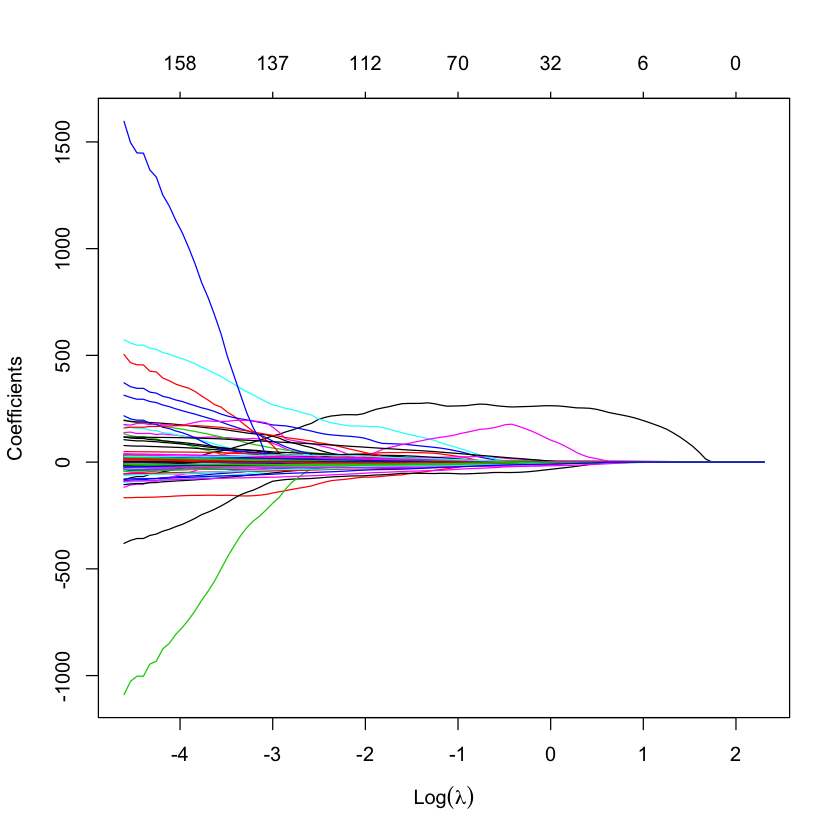

In [66]:
#LASSO L1-REGULARIZATION 

v<-c(colnames(data.train[,-2]))

library(glmnet)
x <- as.matrix(data.train[,v])
y <- data.train$VALENCE.PLEASANTNESS
lasso.mod <- glmnet(x, y, alpha = 1, lambda = 10^seq(1, -2, length = 100))
plot(lasso.mod, "lambda", xlab = parse(text = "Log(lambda)"))

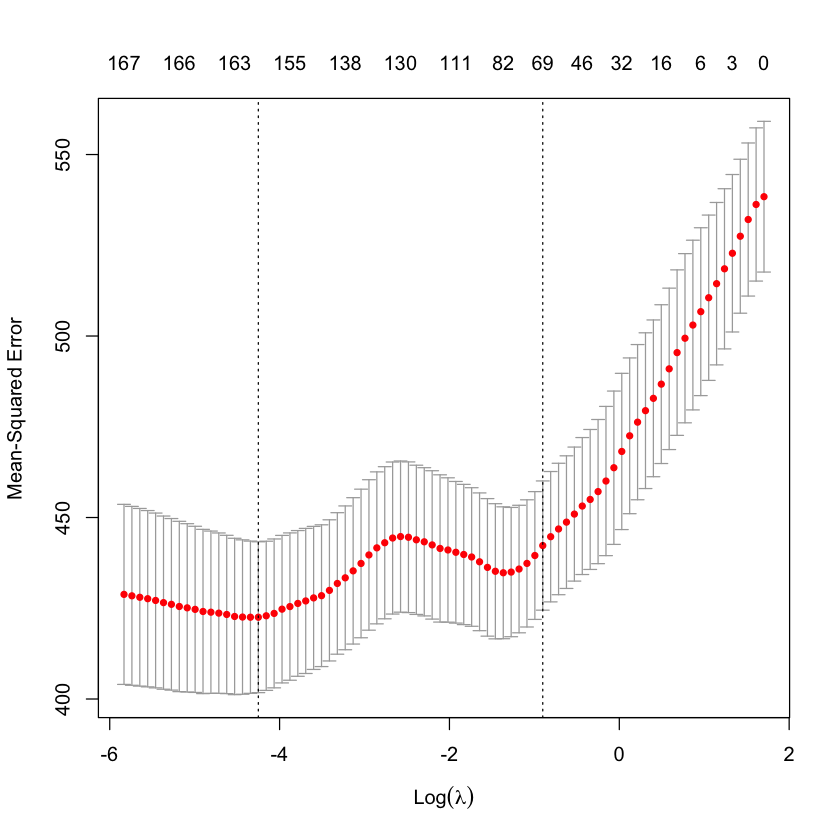

In [67]:
cv.lasso <- cv.glmnet(x, y, alpha = 1, nfold = 10)
plot(cv.lasso)

In [68]:
best.lasso <- glmnet(x, y, alpha = 1, lambda = cv.lasso$lambda.min)
coef(best.lasso)
best.lasso


168 x 1 sparse Matrix of class "dgCMatrix"
                         s0
(Intercept)   -1.625504e+02
Intensity     -1.933351e+00
piPC06         5.200608e+00
X2             2.090271e+01
X4A           -7.132889e+01
VE1_X         -3.490931e+01
VE2_Dz.v.      1.391540e+02
VE1_Dz.p.     -3.287126e+01
SpAbs_B.e.    -4.380063e+00
SpMAD_B.p.     1.693888e+02
ATS6s          3.338299e+00
ATSC7m         5.038635e+00
ATSC8m        -2.103282e+00
ATSC1e         1.796214e+02
MATS1v         .           
MATS1i         1.069072e+02
MATS6i         9.605495e+00
MATS8i        -1.211728e+01
MATS5s        -1.410179e+01
GATS1e        -1.013685e+01
GATS2p        -2.121550e+01
GATS6i        -3.192238e+01
GATS7i         2.569623e+01
GATS8i        -2.535595e+01
JGI3          -6.524629e+01
JGI6          -3.916394e+00
JGI9           4.384564e+02
SpMax5_Bh.m.   1.132209e+01
SpMax4_Bh.p.   2.364550e+01
SpMax6_Bh.i.   1.537568e+00
SpMin5_Bh.m.  -5.407912e+00
SpMin7_Bh.m.   7.400570e+01
SpMin8_Bh.m.  -2.509759e+01
SpMin


Call:  glmnet(x = x, y = y, alpha = 1, lambda = cv.lasso$lambda.min) 

   Df  %Dev  Lambda
1 164 61.47 0.01426

The coefficient found are much smaller than the ones with multilinear regression 